In [224]:
# Supondo que y = 3x + 2

x = [1, 2, 3, 4, 5]
y = [5, 8, 11, 14, 17]

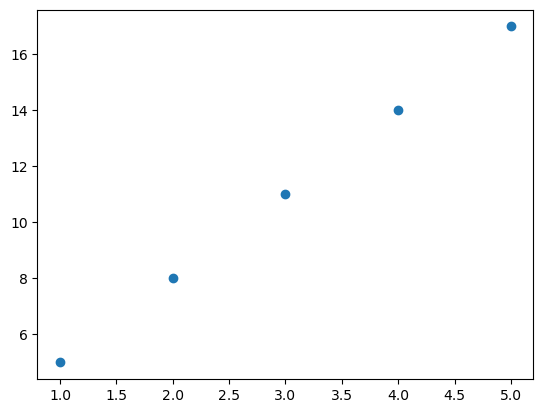

In [225]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')
plt.show()

In [226]:
def preditivo(w0,w1,x):
    return w0 + w1 * x

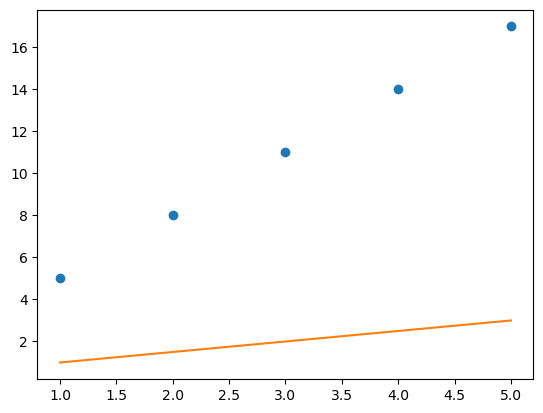

In [227]:
y_pred = []
for i in x:
    y_pred.append(preditivo(0.5,0.5,i))


plt.plot(x, y, 'o')
plt.plot(x, y_pred)
plt.show()

In [228]:
def gradiente_wo(w0,w1,x,y):
    soma_erro = 0
    m=len(x)
    for i in range(len(x)):
        erro = preditivo(w0,w1,x[i]) - y[i]
        soma_erro += erro
    return soma_erro/m

#------------------------------------------------------------

def gradiente_w1(w0,w1,x,y):
    soma_erro = 0
    m=len(x)
    for i in range(len(x)):
        erro = (preditivo(w0,w1,x[i]) - y[i]) * x[i]
        soma_erro += erro

    return soma_erro/m

In [229]:
def novo_w0(w0,w1,x,y,taxa_aprendizado):
    return w0 - taxa_aprendizado * gradiente_wo(w0,w1,x,y)

def novo_w1(w0,w1,x,y,taxa_aprendizado):
    return w1 - taxa_aprendizado * gradiente_w1(w0,w1,x,y)

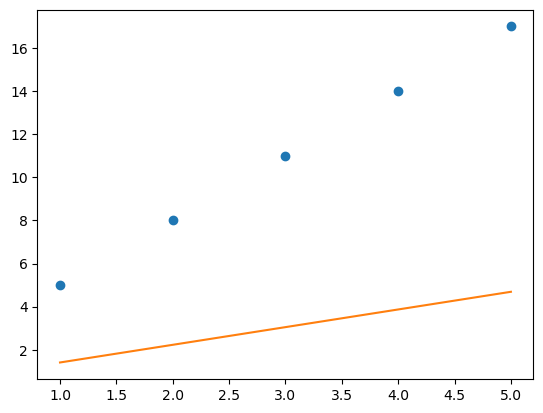

In [278]:
w0 = novo_w0(0.5, 0.5, x, y, 0.01)
w1 = novo_w1(0.5, 0.5, x, y, 0.01)

y_pred = []
for i in x:
    y_pred.append(preditivo(w0,w1,i))

plt.plot(x, y, 'o')
plt.plot(x, y_pred)
plt.show()

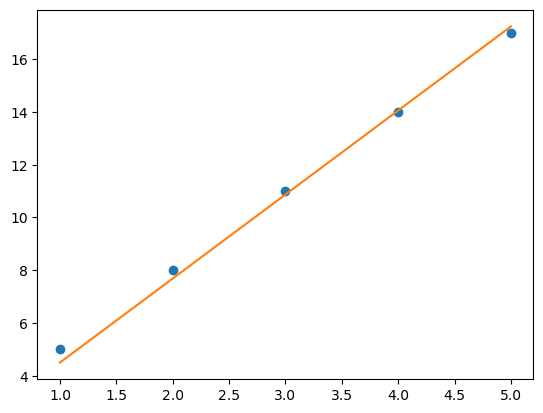

In [281]:
for i in range(40):
    w0 = novo_w0(w0, w1, x, y, 0.01)
    w1 = novo_w1(w0, w1, x, y, 0.01)

y_pred = []
#para cada interação plot a reta pontilhada que representa a predição mostrando a evolução do modelo
for i in x:
    y_pred.append(preditivo(w0,w1,i))
    
plt.plot(x, y, 'o')
plt.plot(x, y_pred)
plt.show()


In [282]:
import numpy as np

class Camada:
    def __init__(self, n_neuronios, n_entradas):
        self.pesos = 0.01 * np.random.randn(n_entradas, n_neuronios)
        self.vies = np.zeros((1, n_neuronios))

    def forward(self, entradas):
        self.entradas = entradas
        self.saida = np.dot(entradas, self.pesos) + self.vies
        return self.saida


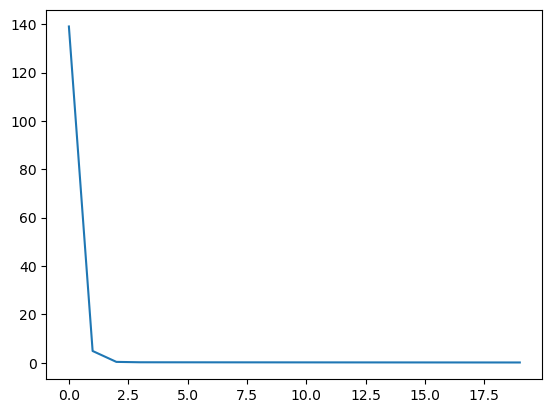

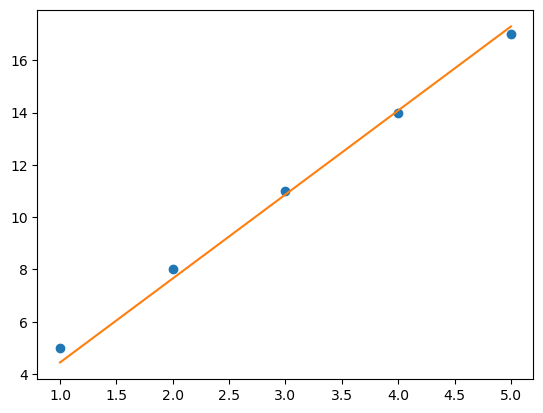

In [283]:
# y = 3x + 2
# Agora com uma camada de neurônios

x = [1, 2, 3, 4, 5]
y = [5, 8, 11, 14, 17]

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

camada_1 = Camada(1, 1)
err0 = []
n = 20
taxa_aprendizado = 0.1

for i in range(n):

    camada_1.forward(x)

    erro = camada_1.saida - y

    gradiente_pesos = np.sum(erro * x) / len(erro)

    gradiente_vies = np.sum(erro) / len(erro)

    camada_1.pesos -= taxa_aprendizado * gradiente_pesos
    camada_1.vies  -= taxa_aprendizado * gradiente_vies

    mse = np.mean(erro**2)
    err0.append(mse)
    

plt.plot(range(n), err0)
plt.show()

y_pred = camada_1.forward(x)

plt.plot(x, y, 'o')
plt.plot(x, y_pred)

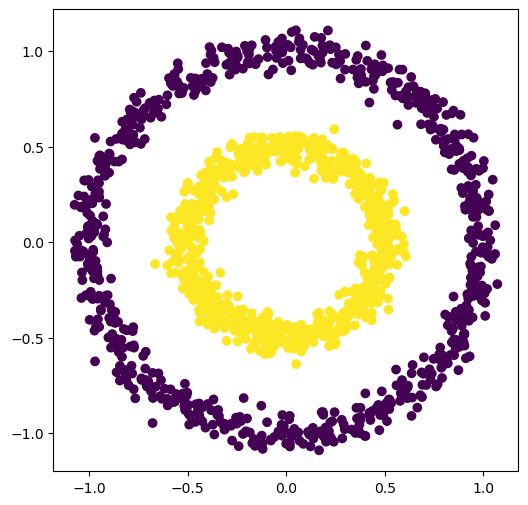

In [298]:
import matplotlib.pyplot as plt
from sklearn import datasets

# E quando os dados não são tão lineares?

n_samples = 1500
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=170
)

X, y = noisy_circles

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

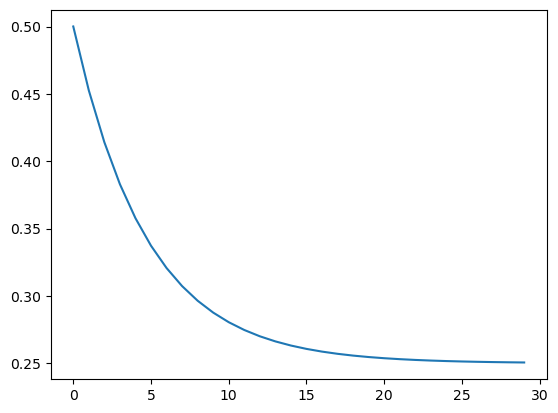

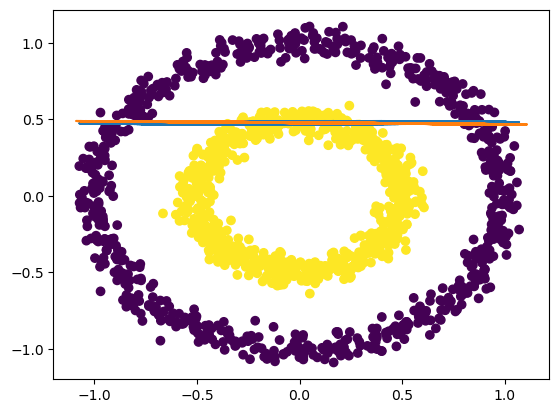

In [305]:
# Aplicando para um problema não linear

X = np.array(X)
y = np.array(y).reshape(-1, 1)

camada_1 = Camada(1, 2)
err0 = []
n = 30
taxa_aprendizado = 0.1

for i in range(n):

    camada_1.forward(X)

    erro = camada_1.saida - y

    gradiente_pesos = np.dot(X.T, erro) / len(erro)

    gradiente_vies = np.sum(erro) / len(erro)

    camada_1.pesos -= taxa_aprendizado * gradiente_pesos
    camada_1.vies  -= taxa_aprendizado * gradiente_vies

    mse = np.mean(erro**2)
    err0.append(mse)

plt.plot(range(n), err0)
plt.show()

y_pred = camada_1.forward(X)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(X, y_pred)
plt.show()

